# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
import scipy.stats
import warnings
import graphviz
from tqdm import tqdm_notebook

from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

### Ответ:

Перед обучением решающего дерева не имеет смысла применять монотонные функции от одного признака и линейные функции от нескольких признаков, так как решающее дерево может само находить нелинейные зависимости между признаками и целевой переменной.

Немонотонные функции от одного признака и нелинейные функции от нескольких признаков могут быть полезны для улучшения качества модели, так как позволяют улавливать более сложные зависимости между признаками и целевой переменной.

Преобразования категориальных признаков необходимы для того, чтобы решающее дерево могло работать с такими данными. Обычно категориальные признаки преобразуются в бинарные переменные.

Стандартизация признаков может быть полезна для ускорения обучения модели, но не влияет на ее качество.

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [4]:
data_set = pd.read_csv('day.csv', parse_dates=[1])
data = data_set[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
data

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


Заметим, что все данные - числовые.

In [5]:
features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'] 
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

In [6]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train, validate = train_test_split(train, test_size=0.25, random_state=42)

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

Исключим выбросы для вещественных признаков, как мы это делали в прошлом дз.

In [7]:
for col in real_features:
    emissions_left = train[col].quantile(0.01)
    emissions_right = train[col].quantile(0.99)
    train = train[(train[col] < emissions_right) & (train[col] > emissions_left)]
    
    emissions_left = test[col].quantile(0.01)
    emissions_right  = test[col].quantile(0.99)
    test = test[(test[col] < emissions_right) & (test[col] > emissions_left)]
    
    emissions_left = validate[col].quantile(0.01)
    emissions_right  = validate[col].quantile(0.99)
    validate = validate[(validate[col] < emissions_right) & (validate[col] > emissions_left)]
    
print("Размер обучающей выборки: ", train.shape)
print("Размер тестовой выборки: ", test.shape)
print("Размер валидационной выборки: ", validate.shape)

Размер обучающей выборки:  (398, 11)
Размер тестовой выборки:  (131, 11)
Размер валидационной выборки:  (130, 11)


Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

In [8]:
X = train[features]
y = train[target_feature]

Напишем функцию для визуализации дерева.

In [9]:
def get_graphviz_graph(decision_tree_regressor):
    '''
    Функция для обучения решающего дерева и построения
    по нему графа graphviz для визуализации
    '''
    
    decision_tree_regressor.fit(X, y)
    dot_data = export_graphviz(
        decision_tree_regressor, out_file=None, 
        feature_names=X.columns, class_names='Price',  
        filled=True, rounded=True, special_characters=True
    )  
    return graphviz.Source(dot_data)  

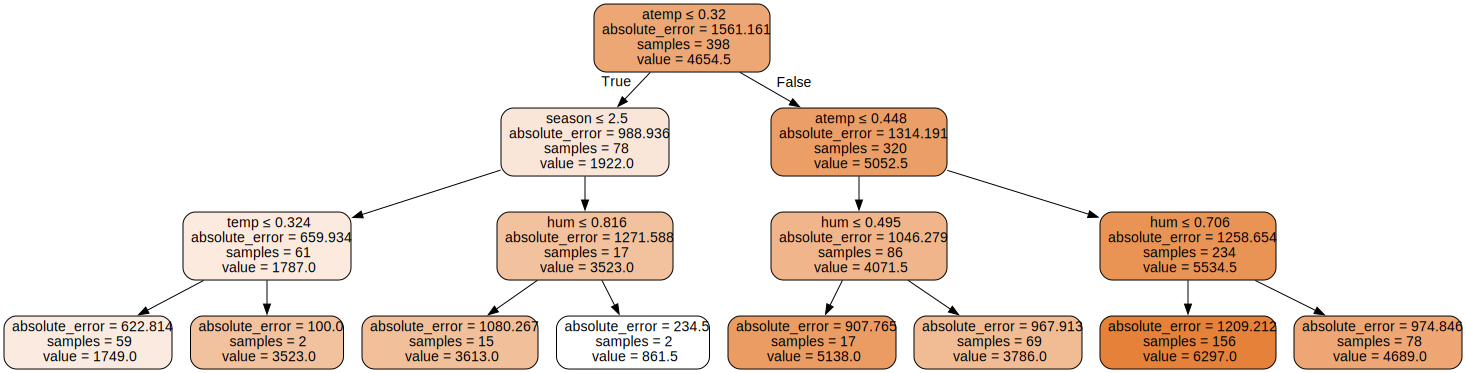

In [10]:
tree = DecisionTreeRegressor(random_state=42, max_depth=3, criterion='absolute_error')
graph = get_graphviz_graph(tree)
graph

Предсказание для валидационной выборки:

In [11]:
pred = tree.predict(validate[features])
round(metrics.mean_absolute_error(validate[target_feature], pred))

1237

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

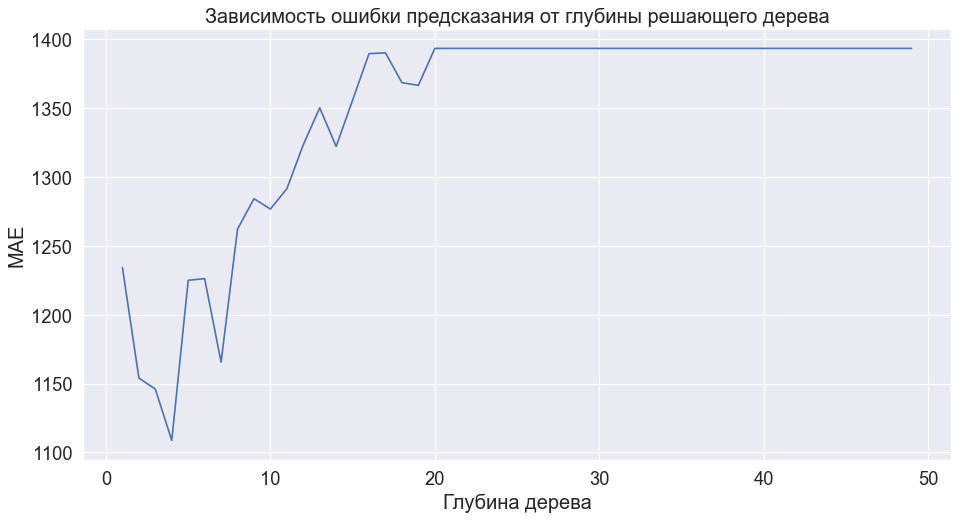

In [12]:
plt.figure(figsize=(14, 7), dpi=80);
x_plt = []
y_plt = []

for depth in range(1, 50):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=0)
    tree.fit(train[features], train[target_feature])
    pred = tree.predict(validate[features])
    
    x_plt.append(depth)
    y_plt.append(metrics.mean_absolute_error(validate[target_feature], pred))

plt.ylabel('MAE');
plt.xlabel("Глубина дерева");
plt.title("Зависимость ошибки предсказания от глубины решающего дерева");

plt.plot(x_plt, y_plt);

Найдём оптимальную глубину:

In [13]:
min_mae = 5000
opt_depth = 0
for depth, mae in zip(x_plt, y_plt):
    if min_mae > mae:
        opt_depth = depth
        min_mae = mae

print("Оптимальная глубина решающего дерева:", opt_depth)
print("MAE при такой глубине:", min_mae)

Оптимальная глубина решающего дерева: 4
MAE при такой глубине: 1108.7554407077587


Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

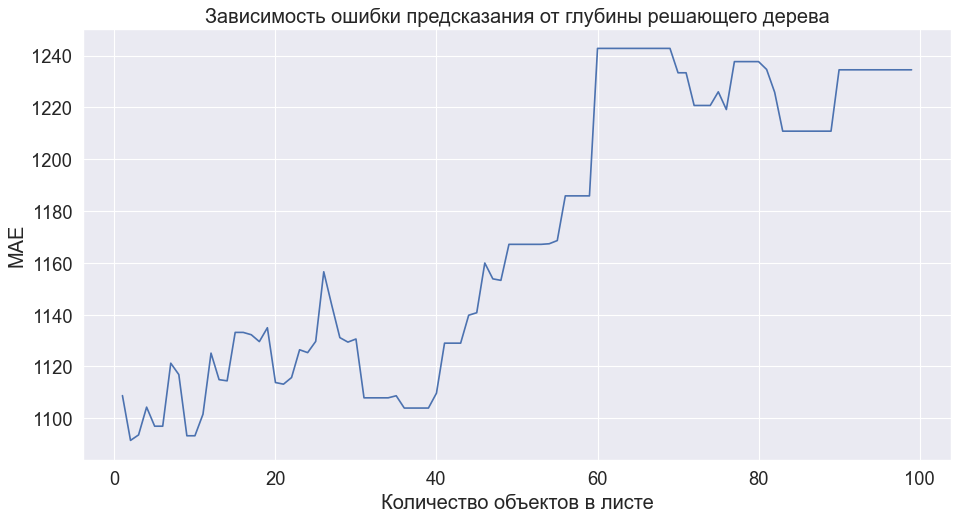

In [14]:
plt.figure(figsize=(14, 7), dpi=80);
x_plt = []
y_plt = []

for samples_leaf in range(1, 100):
    tree = DecisionTreeRegressor(max_depth=opt_depth, min_samples_leaf=samples_leaf, random_state=0)
    tree.fit(train[features], train[target_feature])
    pred = tree.predict(validate[features])
    x_plt.append(samples_leaf)
    y_plt.append(metrics.mean_absolute_error(validate[target_feature], pred))

plt.ylabel('MAE');
plt.xlabel("Количество объектов в листе");
plt.title("Зависимость ошибки предсказания от глубины решающего дерева");

plt.plot(x_plt, y_plt);

Найдём оптимальное количество объектов в листе:

In [15]:
min_mae = 5000
opt_samples_leaf = 0
for samples_leaf, mae in zip(x_plt, y_plt):
    if min_mae > mae:
        opt_samples_leaf = samples_leaf
        min_mae = mae

print("Оптимальная количество объектов решающего дерева:", opt_samples_leaf)
print("MAE при такой глубине:", min_mae)

Оптимальная количество объектов решающего дерева: 2
MAE при такой глубине: 1091.4743509641687


Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

In [16]:
tree = DecisionTreeRegressor(max_depth=opt_depth, min_samples_leaf=opt_samples_leaf, criterion='absolute_error', random_state=42)
tree.fit(train[features], train[target_feature])
pred = tree.predict(test[features])

print("MAE на тестовой выборке:", round(metrics.mean_absolute_error(test[target_feature], pred)))

MAE на тестовой выборке: 1117


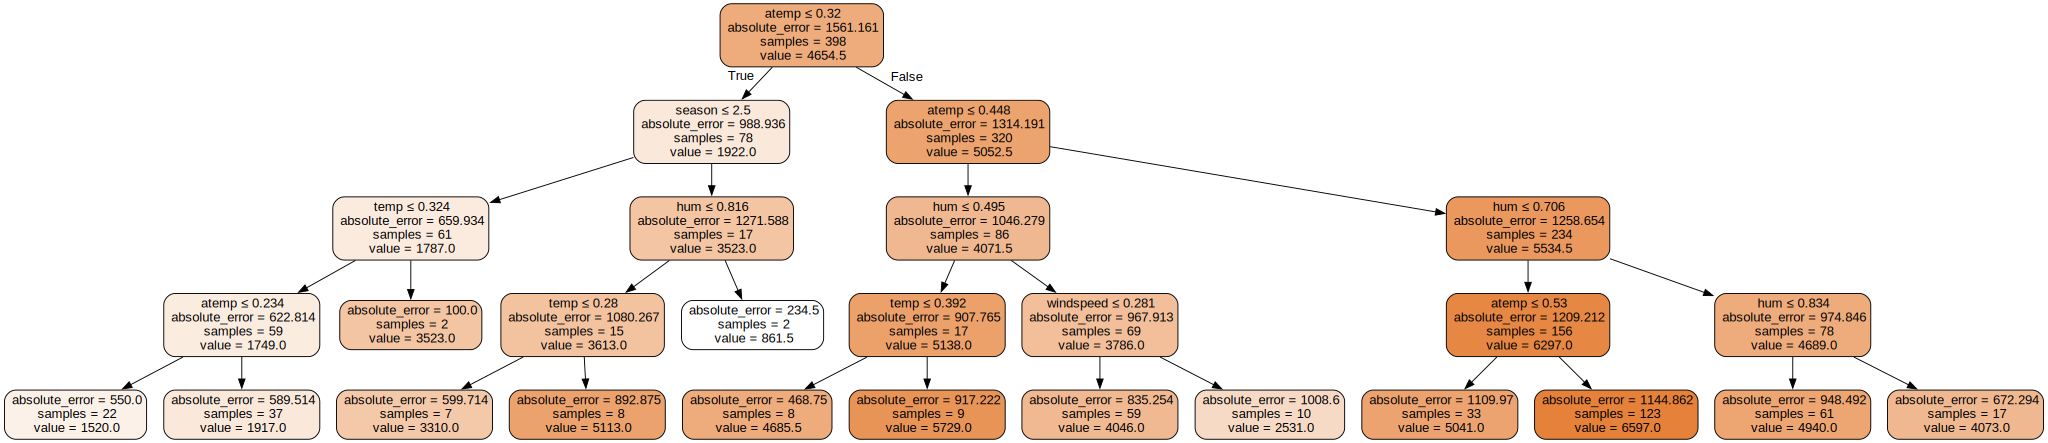

In [17]:
graph = get_graphviz_graph(tree)
graph

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

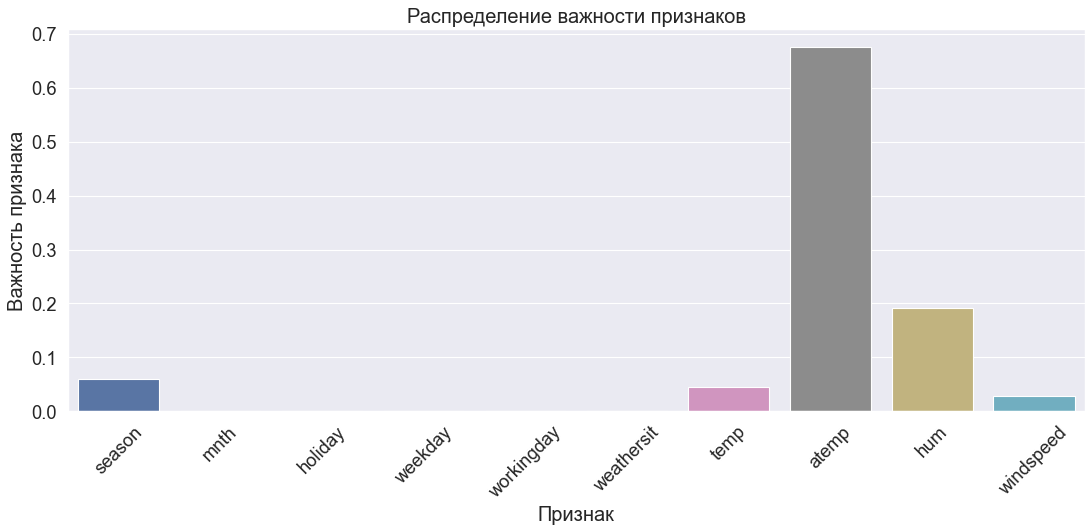

In [18]:
plt.figure(figsize=(14, 7), dpi=80);

ans = {}
ans['name'] = train[features].columns
ans['impact'] = tree.feature_importances_

sns.barplot(x="name", y="impact", data=ans);

plt.ylabel('Важность признака');
plt.xlabel("Признак");
plt.title("Распределение важности признаков");

plt.xticks(rotation=45)
plt.tight_layout();

Сделайте выводы.

Таким образом, мы подобрали гиперпараметры для решающего дерева на валидационной выборке. А именно:
1) Оптимальная глубина разрешающего дерева: 4

2) Оптимальная количество объектов разрешающего дерева: 2

Также поняли, какие признаки для дерева являются наиболее значимыми: atemp, season и hum.
И посчитали на тестовой выборке качество метрики MAE = 1117. Хотя изначально была равна 1237. То есть подобрав нужные гиперпараметры мы немного улучшили точность модели.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [19]:
amout_trees = 500
model = RandomForestRegressor(n_estimators=amout_trees, criterion='mae')
model.fit(train[features], train[target_feature])

pred_train = model.predict(train[features])
pred_validate = model.predict(validate[features])

print("MAE на обучающей выборке:", round(metrics.mean_absolute_error(train[target_feature], pred_train)))
print("MAE на валидационной выборке:", round(metrics.mean_absolute_error(validate[target_feature], pred_validate)))

MAE на обучающей выборке: 384
MAE на валидационной выборке: 1036


Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

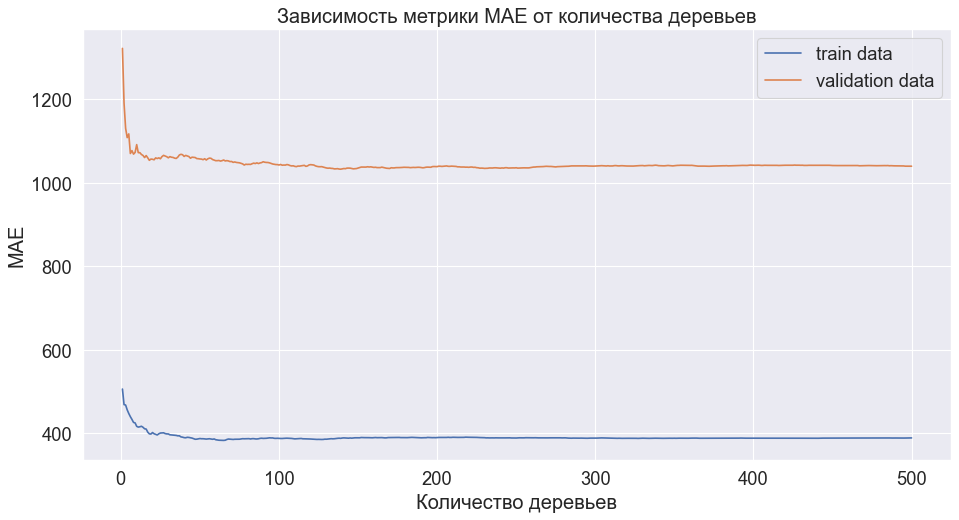

In [20]:
model.estimators_[1]
plt.figure(figsize=(14, 7), dpi=80);

y_train = []
y_val = []

model = RandomForestRegressor(n_estimators=500, criterion='mae')
model.fit(train[features], train[target_feature])
ests = model.estimators_

for est in range(1, 501):
    model_est_trees = model
    model_est_trees.estimators_ = ests[:est]

    pred = model_est_trees.predict(train[features])
    y_train.append(metrics.mean_absolute_error(train[target_feature], pred))
    pred = model_est_trees.predict(validate[features])
    y_val.append(metrics.mean_absolute_error(validate[target_feature], pred))

    
x_train = np.arange(1, 501)
x_val = np.arange(1, 501)

plt.plot(x_train, y_train, label='train data')
plt.plot(x_val, y_val, label='validation data')

plt.ylabel('MAE')
plt.xlabel("Количество деревьев")
plt.title("Зависимость метрики MAE от количества деревьев")

plt.legend()
plt.show()

Найдём оптимальное количество деревьев в лесу.

In [27]:
min_mae = 5000
opt_count_trees = 0
for threes, mae in zip(x_val, y_val):
    if min_mae > mae:
        opt_count_trees = threes
        min_mae = mae

print("Оптимальная глубина решающего дерева:", opt_count_trees)
print("MAE при такой глубине:", min_mae)

Оптимальная глубина решающего дерева: 139
MAE при такой глубине: 1032.3243497509684


Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

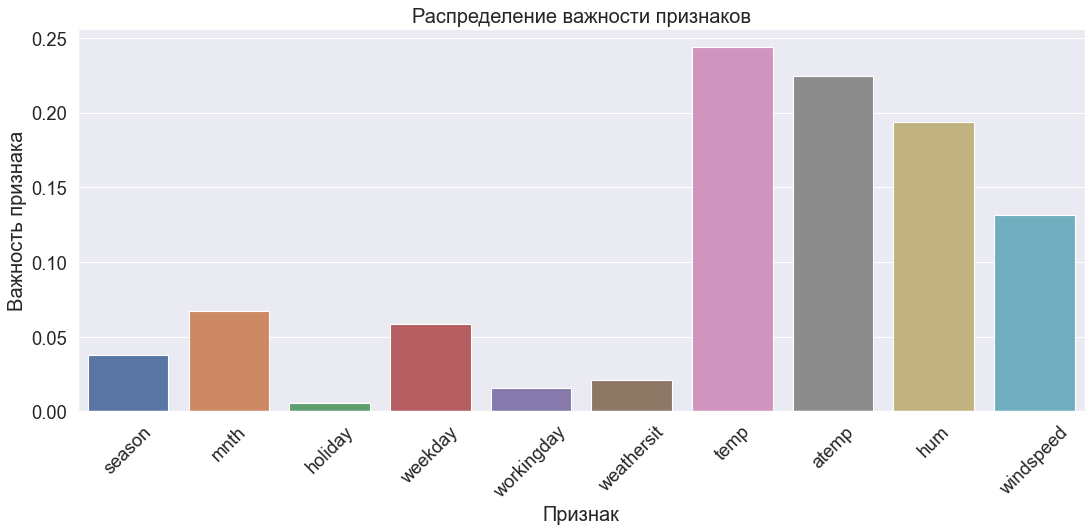

In [21]:
plt.figure(figsize=(14, 7), dpi=80);

ans = {}
ans['name'] = train[features].columns
ans['impact'] = model.feature_importances_

sns.barplot(x="name", y="impact", data=ans);

plt.ylabel('Важность признака');
plt.xlabel("Признак");
plt.title("Распределение важности признаков");

plt.xticks(rotation=45)
plt.tight_layout();

Теперь оценим качество модели на тестовой выборке.

In [24]:
pred = model.predict(test[features])
print("MAE на тестовом наборе:", round(metrics.mean_absolute_error(test[target_feature], pred)))

MAE на тестовом наборе: 1096


Сделайте выводы.

Таким образом, используя случайный лес мы получили более качественную модель предсказания, чем исполльзуя одно решающее дерево. Причём для дерева мы подбирали гиперпараметры, чтобы получить наиболее корректную модель. Для леса - мы ничего не делали особо. Просто установили количество деревьев. 

1) MAE для решающего дерева: 1117

2) MAE для случайного леса: 1096

Приэтом в нашем случае было достаточно 139 деревьев, далее MAE не изменяется с ростом количества деревьев. И каждый из признаков являлся важным для модели, судя по диаграмме распределения важности.